### Phys 629, Fall 2023, University of Mississippi


# Lecture 6, Chapter 3: Probability and Statistical Distributions

Material in this lecture and notebook is based upon the Basic Stats portion of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), the Introduction to Probability & Statistics portion of A. Connolly's & Ž. Ivezić's "Astrostatistics & Machine Learning" class at the University of Washington (ASTR 598, https://github.com/dirac-institute/uw-astr598-w18), J. Bovy's mini-course on "Statistics & Inference in Astrophysics" at the University of Toronto (http://astro.utoronto.ca/~bovy/teaching.html), and Stephen R. Taylor (https://github.com/VanderbiltAstronomy/astr_8070_s22). 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 3. 

***Exercises required for class participation are in <font color='red'>red</font>.***

### Poisson distribution

This is a distribution for a discrete variable, telling you the probability of $k$ events occuring within a certain time when the mean is $\mu$. 

An early and famous example of the use of this distribution was to **model the expected number of Prussian cavalrymen that would be kicked to death by their own horse**. Statistics has many applications...

$$ p(k|\mu) = \frac{\mu^k \exp(-\mu)}{k!} $$

where the mean $\mu$ completely characterizes the distribution. The mode is $(\mu-1)$, the standard deviation is $\sqrt{\mu}$, the skewness is $1/\sqrt{\mu}$, and the kurtosis is $1/\mu$.

As $\mu$ increases the Poisson distribution becomes more and more similar to a Gaussian with $\mathcal{N}(\mu,\sqrt{\mu})$. The Poisson distribution is sometimes called the ***law of small numbers*** or ***law of rare events***.

<font color='red'>Complete and execute the following cell for $\mu=3$.</font>

In [3]:
# Practice the Poisson distribution
import scipy
dist = scipy.stats.poisson(3)

k = dist.rvs(20) # make 20 draws
pmf = dist.pmf(6) # evaluate probability mass function at 6

### The Cauchy (Lorentzian) Distribution
This is a continuous distribution $$p(x| \gamma, \mu) = \frac{1}{\pi\gamma}\Bigg(\frac{\gamma^2}{\gamma^2+(x-\mu)^2}\Bigg)$$

where $\mu$ is location parameter and $\gamma$ is scale parameter. The median and mode of this distribution are equal to $\mu$. 

Because its tails decrease as slowly as $x^{−2}$ for large $|x|$, the mean, variance, standard deviation, and higher moments do not exist for this distribution. Therefore, given a set of measured $x_i$ drawn from the Cauchy distribution, the location and scale parameters cannot be estimated by computing the mean value and standard deviation using standard expressions.

However, one can always compute the mean value for a set of numbers $x_i$, but this mean value will have a large scatter around $\mu$, and this scatter will not decrease with the sample size.

### Student's $t$ Distribution

Another distribution that we'll see later is the Student's $t$ Distribution.

If you have a sample of $N$ measurements, $\{x_i\}$, drawn from a Gaussian distribution, $\mathscr{N}(\mu,\sigma)$, and you apply the transform

$$t = \frac{\overline{x}-\mu}{s/\sqrt{N}},$$

then $t$ will be distributed according to Student's $t$ with the following pdf (for $k$ degrees of freedom):

$$p(x|k) = \frac{\Gamma(\frac{k+1}{2})}{\sqrt{\pi k} \Gamma(\frac{k}{2})} \left(1+\frac{x^2}{k}\right)^{-\frac{k+1}{2}}$$

As with a Gaussian, Student's $t$ is bell shaped, but has "heavier" tails.

Note the similarity between $t$ and $z$ for a Gaussian (as defined in the $\chi^2$ section above), which reflects the difference between data-derived estimates of the mean and standard deviation and their true values.

In fact, although often approximated as a Gaussian distribution, the mean of a sample actually follows a Student's $t$ distribution. This matters when sample sizes are small, but mostly irrelevant for "Big Data" examples.

/home/subhayu/miniconda3/envs/phys629/lib/python3.8/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


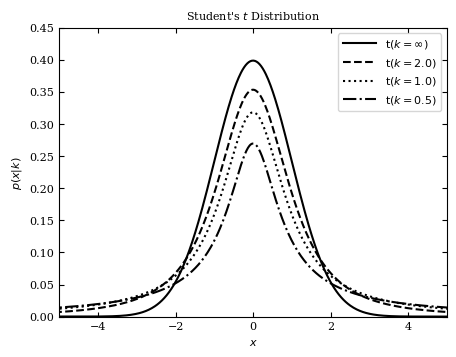

In [4]:
# Execute this cell
%run ../../lectures/scripts/fig_student_t_distribution.py

**FUN FACT:** "Student" was the pen name of W. S. Gosset, who worked for the Guinness brewery in Dublin, Ireland. He was interested in the statistical analysis of small samples, e.g., the chemical properties of barley when the sample size might be as small as $3$.

![https://thatsmaths.files.wordpress.com/2014/04/gosset-plaque.jpg](https://thatsmaths.files.wordpress.com/2014/04/gosset-plaque.jpg)

### What's the point of all these distributions?

* There are many other distributions that we haven't covered here (see the textbook).

* The point is that we are going to make some measurement. 

* To understand the significance of our measurement, we want to know how likely it is that we would get that measurement in our experiment by random chance. 

* To determine that we need to know the shape of the distribution. Let's say that we find that $x=6$. If our data is $\chi^2$ distributed with 2 degrees of freedom, then we would integrate the $k=2$ curve above from 6 to $\infty$ to determine how likely it is that we would have gotten 6 or larger by chance.  If our distribution was instead $t$ distributed, we would get a *very* different answer.  

Note that it is important that you decide *ahead of time* what the metric will be for deciding whether this result is significant or not.  More on this later, but see [this article](http://fivethirtyeight.com/features/science-isnt-broken/).

## Central Limit Theorem <a class="anchor" id="one"></a>

One of the reasons that a Gaussian (or Normal) Distribution is so common is because of the **Central Limit Theorem**:

> For an arbitrary distribution, $h(x)$, with a well-defined mean, $\mu$, and standard deviation, $\sigma$ (i.e., tails should fall off faster than $1/x^2$) the mean of $N$ values \{$x_i$\} drawn from the distribution will follow a Gaussian Distribution with $\mathcal{N}(\mu,\sigma/\sqrt{N})$. (A Cauchy distribution is one example where this fails.)

This theorem is the foundation for performing repeat measurements in order to improve the accuracy of one's experiment. This is truly amazing! No matter what distribution you start off with (provided it has a well defined mean and standard deviation) or the measurement process itself, repeated batches of $N$ draws will follow a Gaussian centered around the mean.  

The **Weak Law of Large Numbers** (aka **Bernoulli's Theorem**) further says that the sample mean will converge to the distribution mean as $N$ increases.

Let's wrap our heads around what this means with some examples. 

We'll first consider $h(x) = \mathcal{N}(\mu=0.5,\sigma=1/\sqrt{12})$. According to the Central Limit Theorem, taking the mean of many batches of $N$ random samples should result in a normal distribution with $\mathcal{N}(\mu=0.5,\sigma=1/\sqrt{12}/\sqrt{N})$.

<font color='red'>Execute this cell</font>

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

<font color='red'>Complete and execute the following cell</font>

Text(0, 0.5, 'pdf')

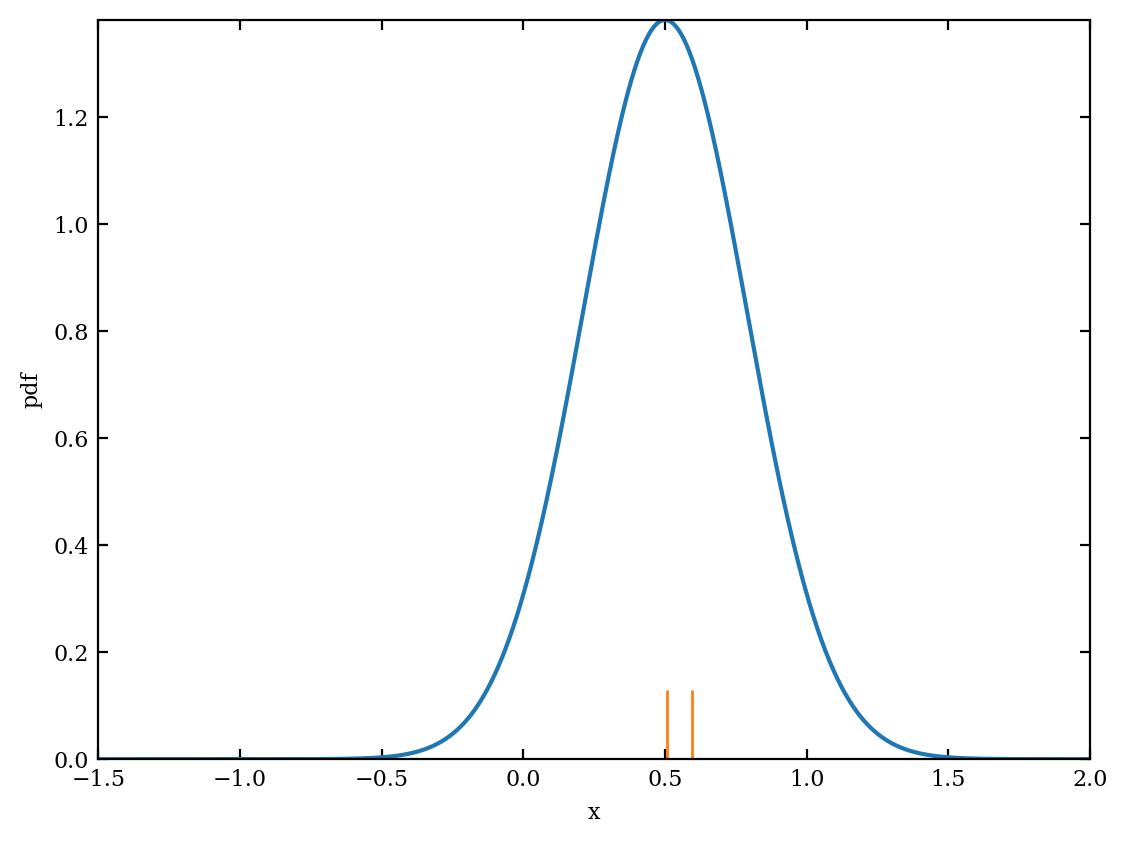

In [6]:
N = 2 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)

xgrid = np.linspace(-1.5,2,1000) # Array to sample the space 
distG = scipy.stats.norm(mu,sigma_h) # Complete
plt.plot(xgrid, distG.pdf(xgrid)) # Complete

x = np.random.normal(mu, sigma_h,2) # Two random draws
plt.plot(x, 0*x, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')

Now let's average those two draws and plot the result (in the same panel). Do it as a histogram for 100,000 batches of 2 samples each. Use a stepfilled histogram that is normalized with 50% transparency and 100 bins.

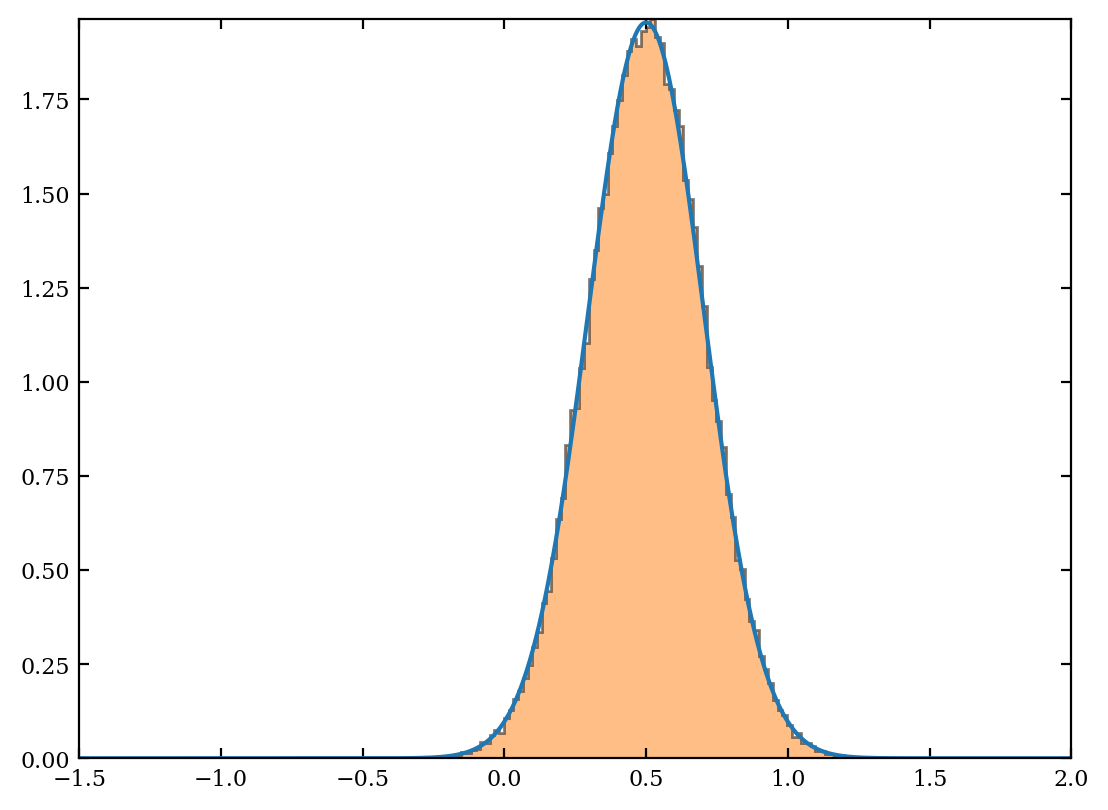

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 2 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)
sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution

xgrid = np.linspace(-1.5,2,1000) # Array to sample the space 

# plot the distribution of means according to central limit theorem
distG = scipy.stats.norm(mu, sigma_cl) # Complete
plt.plot(xgrid, distG.pdf(xgrid)) # Complete

# Add a histogram that is the mean of 100,000 batches of N draws
yy = []
for i in np.arange(100000):
    xx = np.random.normal(mu, sigma_h, 2) # N random draws
    yy.append(np.mean(xx)) # Append average of those random draws to the end of the array

hist = plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True)

Well that's great and all, but didn't I say this worked for arbitrary generating distributions $h(x)$ so long as their mean and standard deviations were well defined? Let's check this out for a uniform distribution with $\mu=0.5$ and width$ =1$, such that the standard deviation is $\sigma=1/\sqrt{12}$.

<font color='red'>Complete the following cell</font>

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 2 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)
sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution

# Complete the rest of this cell with a repetition of the the previous exercise,
# except drawing N-sample batches from a [0,1] uniform distribution, and plotting
# the distribution of the means of those batches. Show that the distribution
# matches that implied by the central limit theorem.

<font color='red'>Now instead of averaging 2 draws, average 3.  Then do it for 10.  Then for 100.  Each time for 100,000 samples.</font>
<font color='red'>Copy your code from above and edit accordingly (or just edit your code from above)</font>

For 100 you will note that your draws are clearly sampling the full range, but the means of those draws are in a *much* more restrictred range. Moreover they are very closely following a Normal Distribution. 

In [9]:
N_range = [3,10,100,100000] # Number of draws
for i in N_range:
    mu = 0.5 # Location
    sigma_h = 1.0 / np.sqrt(12) # scale of h(x)
    sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution

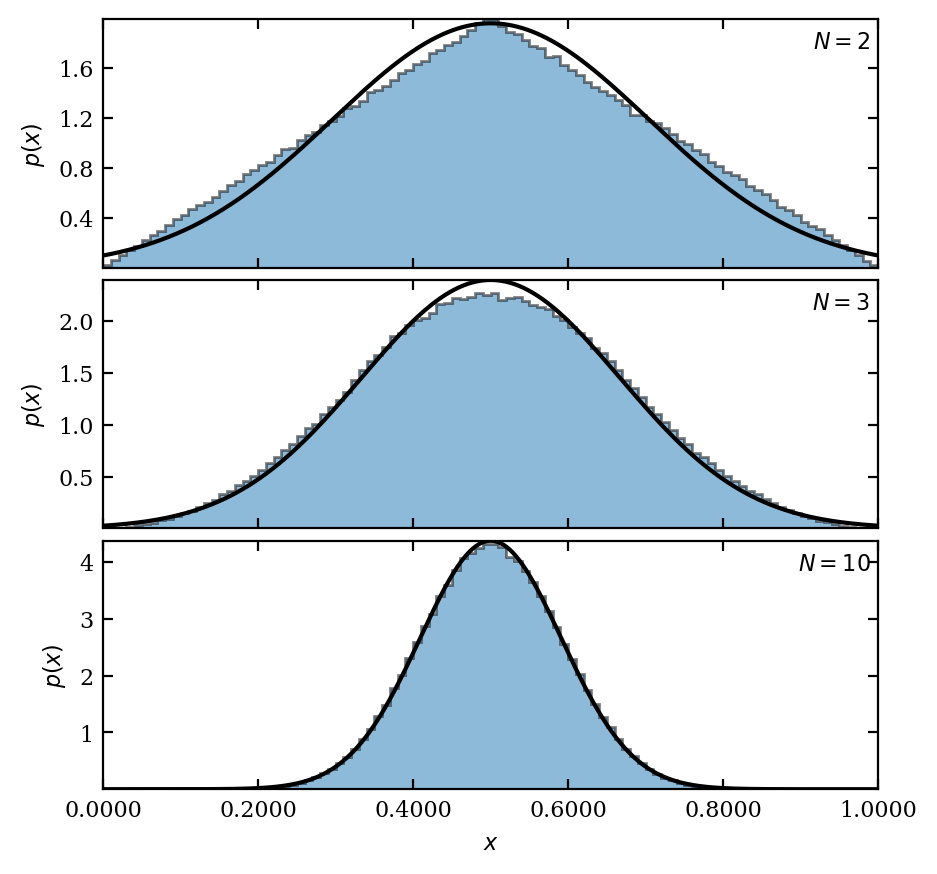

<Figure size 640x480 with 0 Axes>

In [10]:
# By the way, if your code is ugly, you can run the 
# following cell to reproduce Ivezic, *Figure 3.20* 
# which nicely illustrates this in one plot.
%run ../../lectures/scripts/fig_central_limit.py

This is truly mind blowing, and a wonderful example of the power and generalizability of statistics in tackling the measured properties of arbitrary distributions. Even if you've never heard of or understood the Central Limit Theorem, you have been implicitly using it your entire career so far. 

If you are confused, then watch this video from the Khan Academy:
[https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem).

## Bivariate and Multivariate pdfs <a class="anchor" id="two"></a>

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\mu_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}y h(x,y) dx dy$$

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the **(dimensionless) correlation coefficient**.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

**The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.**   

These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Ivezic, Figure 3.22):
![Ivezic, Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

The ellpse is tilted because of the covariance. 

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution. (Or in different terminology, the semi-minor and semi-major axes of the ellipse). These are called the **principal axes** and are given by

$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$

and

$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this (rotated) coordinate system are

$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that **the correlation vanishes in this coordinate system (by definition)** and the bivariate Gaussian is just a product of two univariate Gaussians.  

This concept will be crucial for understanding ***Principal Component Analysis*** when we will get to later, where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that **outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$**.  

Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Ivezic, Figure 3.23 for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

<font color='red'>For an example of how to generate a bivariate distribution and plot confidence contours, read through, understand, and execute the following cell.</font>

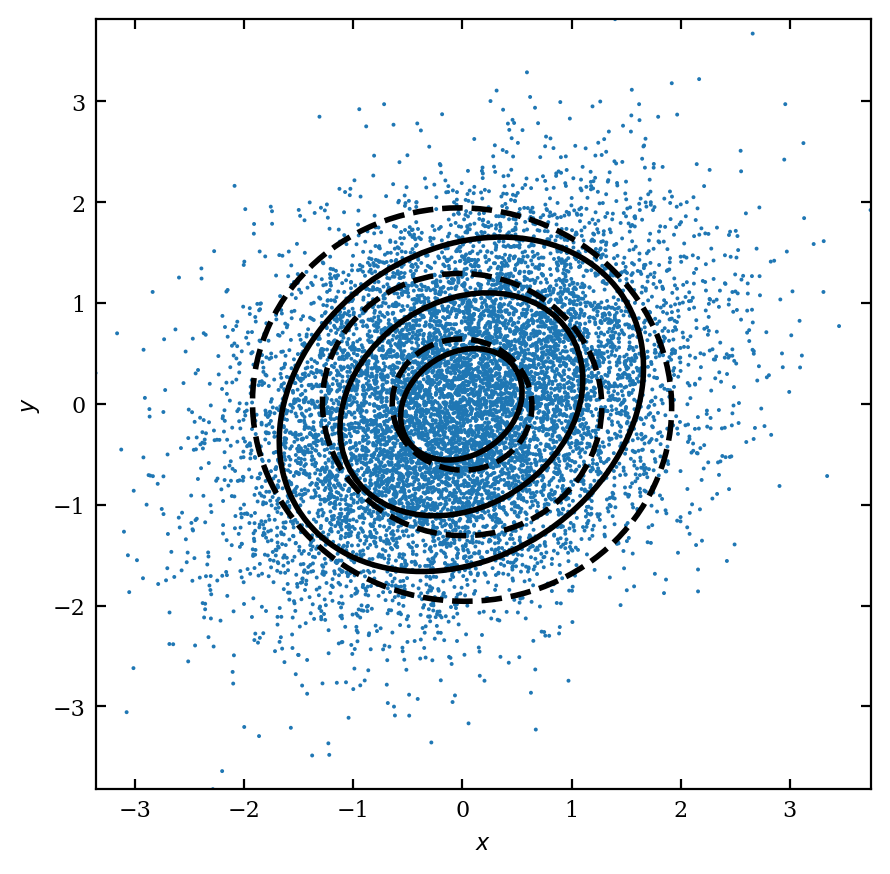

In [11]:
# Base code drawn from Ivezic, Figure 3.22, edited by G. Richards to simplify the example

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

# directional means
mux = 0
muy = 0

# directional standard deviations
sigx = 1.0
sigy = 1.0

# covariance
sigxy = 0.3

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = np.array([mux, muy])
cov = np.array([[sigx**2, sigxy], [sigxy, sigy**2]])
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#------------------------------------------------------------
# Add 2000 outliers drawn from a 5 times wider distribution
# with opposite covariance
xout, yout = np.random.multivariate_normal(mean, 
                                           5*cov*np.array([[1,-1],[-1,1]]), 
                                           2000).T

xt = np.append(x,xout)
yt = np.append(y,yout)

# Fit those data with a bivariate normal distribution
# Use robust and non-robust statistics estimates
mean_nr, sigma_x_nr, sigma_y_nr, alpha_nr = fit_bivariate_normal(xt, yt, robust=False)
mean_r, sigma_x_r, sigma_y_r, alpha_r = fit_bivariate_normal(xt, yt, robust=True)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean_nr, N * sigma_x_nr, N * sigma_y_nr, 
                         angle=alpha_nr * 180./np.pi, lw=2, 
                         ec='k', fc='none', ls='dashed'))
    ax.add_patch(Ellipse(mean_r, N * sigma_x_r, N * sigma_y_r, 
                         angle=alpha_r * 180./np.pi, lw=2, 
                         ec='k', fc='none'))
    
ax.set_xlabel('$x$');
ax.set_ylabel('$y$');

The non-robust estimates (***dashed lines***) give biased sigma ellipses due to the outliers. The robust estimates (***solid lines***) do much better.

We can generalize the way we describe **Gaussian distributions in multiple dimensions**, $M$, through the elegance of linear algebra. Instead of writing everything in terms of separate coordinates, we can bundle everything together in an $M$-dimensional coordinate vector $\vec{x}$, mean vector $\vec{\mu}$, and covariance matrix $\mathbf{C} = E([\vec{x}-\vec{\mu}][\vec{x}-\vec{\mu}]^T)$.

$$p(\vec{x}|\vec{\mu},\mathbf{C}) = \frac{1}{\sqrt{\mathrm{det}(2\pi\mathbf{C})}} \exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) \right] $$

where 

$$ C_{kj} = \int_{-\infty}^\infty (x^k-\mu^k)(x^j-\mu^j)p(\vec{x}|\vec{\mu},\mathbf{C})\,d^M x $$

and 

$$ (\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) = \sum_{k=1}^M \sum_{j=1}^M [\mathbf{C}^{-1}]_{kj}(x^k-\mu^k)(x^j-\mu^j) $$